In [48]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importing data

df = pd.read_csv('data/eda_cleaned+improved.csv', delimiter=",")

df['date'] = pd.to_datetime(df['date'])

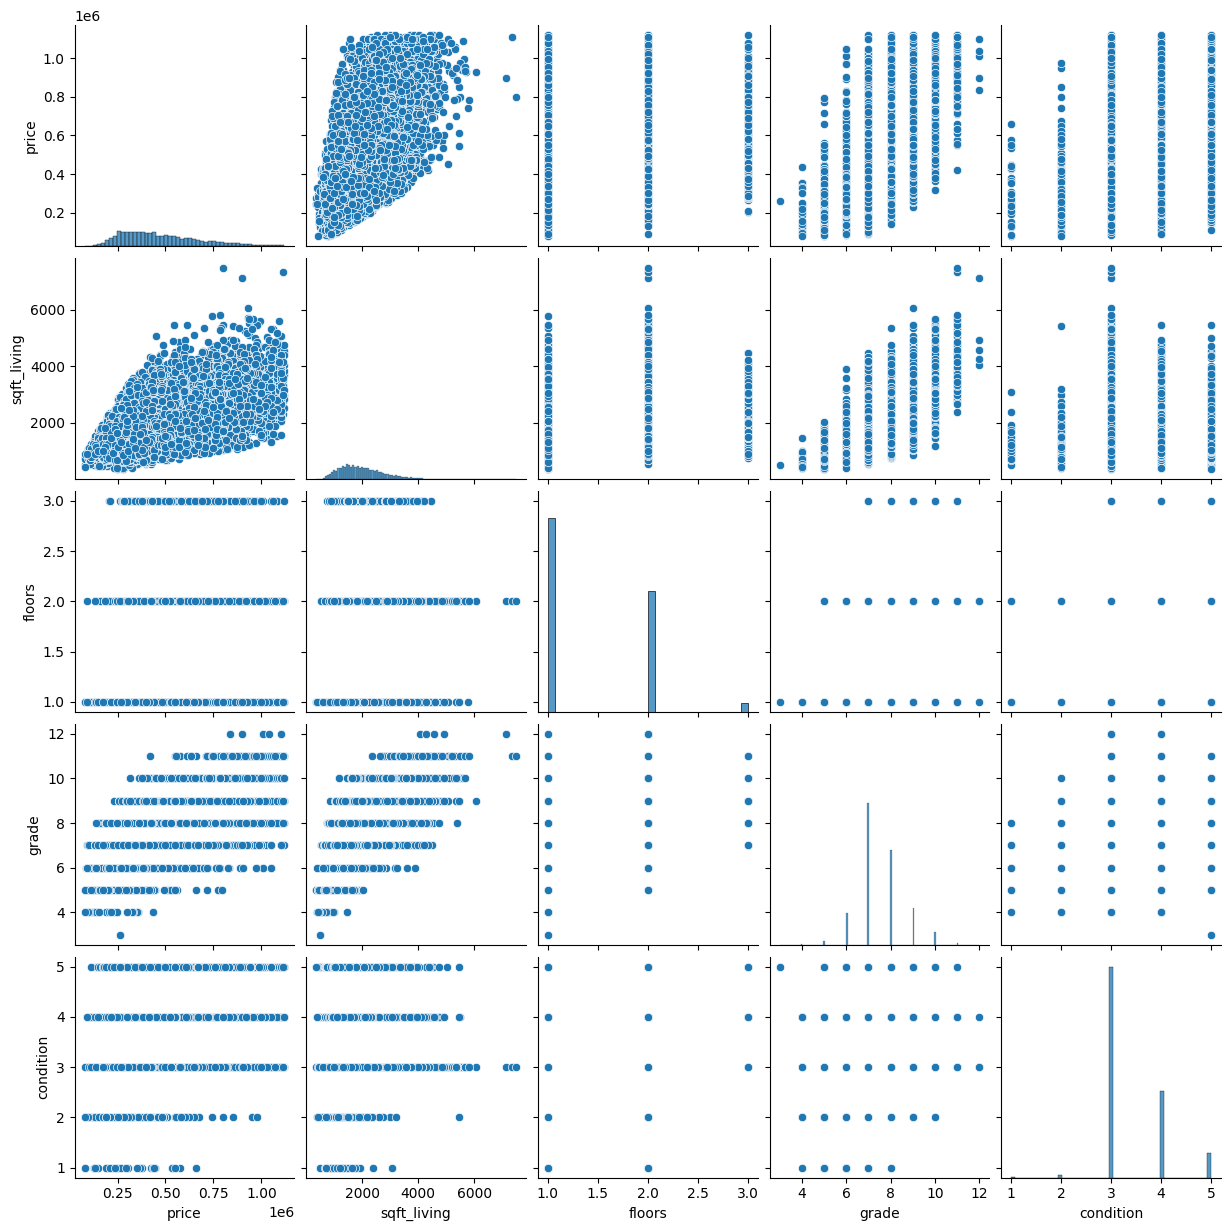

In [49]:
# pairplot with hue price


sns.pairplot(df[['price', 'sqft_living', 'floors', 'grade', 'condition']])
# to show
plt.show()



In [50]:
desired_zipcodes = [98102, 98112, 98122, 98121, 98103, 98109, 98107, 98104, 98117, 98118]

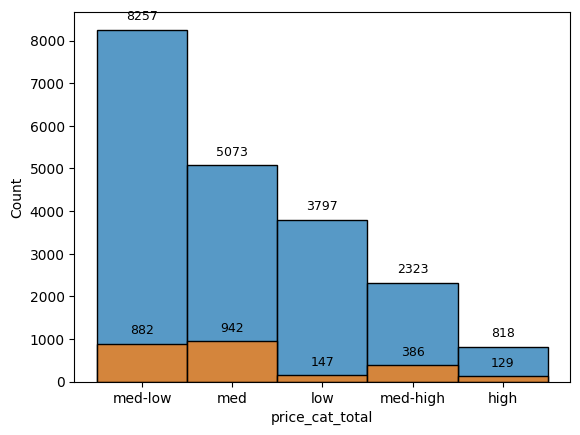

In [51]:
# Getting a feeling how the distribution is amongst the 5 price categories

ax = sns.histplot(
    data=df,
    x='price_cat_total'
)

# Getting a feeling on the number of objects in the desired zip codes

df_desired_zips = df[df['zipcode'].isin(desired_zipcodes)]

sns.histplot(
    data=df_desired_zips,
    x='price_cat_total'
)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')


In [52]:
df_desired_zips_and_price = df_desired_zips[df_desired_zips['price_cat_total'] == 'med']

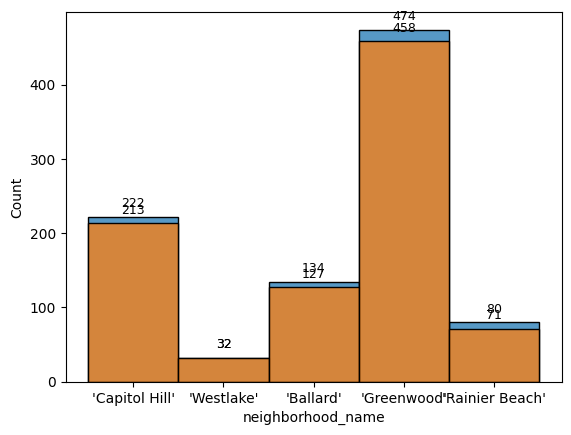

In [53]:

ax = sns.histplot(
    data=df_desired_zips_and_price,
    x='neighborhood_name'
)

df_top_quality = df_desired_zips_and_price[
    (df_desired_zips_and_price['condition'] >= 3) & (df_desired_zips_and_price['grade'] >= 7)
]

sns.histplot(
    data=df_top_quality,
    x='neighborhood_name'
)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
    



In [54]:
# Adding month and year as a column


    
df_top_quality['year'] = df_top_quality['date'].dt.year
df_top_quality['month'] = df_top_quality['date'].dt.month


/var/folders/wg/07rp9njx20s2h8ysbvnfcd400000gn/T/ipykernel_27015/2435777086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_quality['year'] = df_top_quality['date'].dt.year
/var/folders/wg/07rp9njx20s2h8ysbvnfcd400000gn/T/ipykernel_27015/2435777086.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_quality['month'] = df_top_quality['date'].dt.month


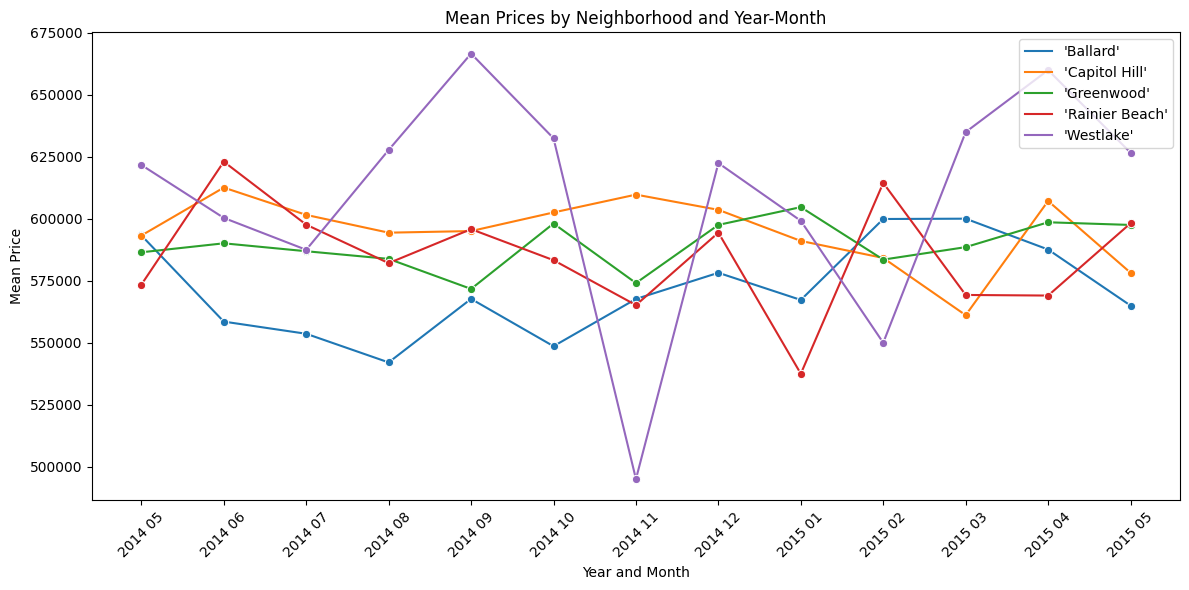

In [67]:
# Create a pivot table to calculate the mean price for each neighborhood, year, and month
pivot_table = df_top_quality.pivot_table(values='price', index=['year', 'month', 'neighborhood_name'], aggfunc='mean').reset_index()

# Combine year and month for x-axis labels
pivot_table['year_month'] = pivot_table['year'].astype(str) + ' ' + pivot_table['month'].apply(lambda x: '{:02d}'.format(x))

# Use Seaborn's lineplot to create the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table, x='year_month', y='price', hue='neighborhood_name', marker='o')

plt.xlabel('Year and Month')
plt.ylabel('Mean Price')
plt.title('Mean Prices by Neighborhood and Year-Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()
